In [1]:
from keras.models import load_model

model = load_model('cats_and_dogs_small_dropout.h5')

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [2]:
from keras.preprocessing import image
import numpy as np

image_path = '/home/alex/下载/学习/python/convnet/Visibility/1858.jpg'

img = image.load_img(image_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[169., 198., 216.],
        [168., 195., 214.],
        [166., 193., 212.],
        ...,
        [202., 187., 154.],
        [204., 189., 156.],
        [205., 190., 157.]],

       [[170., 197., 216.],
        [171., 196., 216.],
        [180., 202., 223.],
        ...,
        [199., 184., 151.],
        [204., 189., 156.],
        [204., 189., 156.]],

       [[168., 194., 209.],
        [176., 197., 216.],
        [179., 1

In [3]:
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


In [4]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

<Figure size 640x480 with 1 Axes>

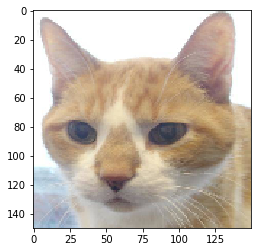

In [5]:
plt.imshow(img_tensor[0])
plt.show()

In [6]:
from keras import models

# 提取前8层输出
layer_outputs = [layer.output for layer in model.layers[:8]]
layer_outputs

[<tf.Tensor 'conv2d_5/Relu:0' shape=(?, 148, 148, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_5/MaxPool:0' shape=(?, 74, 74, 32) dtype=float32>,
 <tf.Tensor 'conv2d_6/Relu:0' shape=(?, 72, 72, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_6/MaxPool:0' shape=(?, 36, 36, 64) dtype=float32>,
 <tf.Tensor 'conv2d_7/Relu:0' shape=(?, 34, 34, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_7/MaxPool:0' shape=(?, 17, 17, 128) dtype=float32>,
 <tf.Tensor 'conv2d_8/Relu:0' shape=(?, 15, 15, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_8/MaxPool:0' shape=(?, 7, 7, 128) dtype=float32>]

In [7]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activation_model

In [8]:
activations = activation_model.predict(img_tensor)

In [9]:
activations_layer_1 = activations[0]
print(activations_layer_1.shape)

(1, 148, 148, 32)


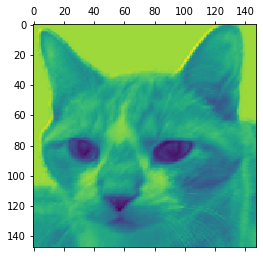

In [10]:
plt.matshow(activations_layer_1[0, :, :, 1], cmap='viridis')

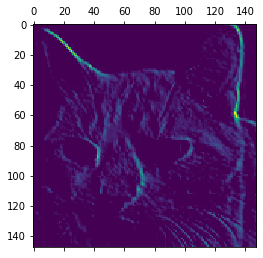

In [11]:
plt.matshow(activations_layer_1[0, :, :, 2], cmap='viridis')

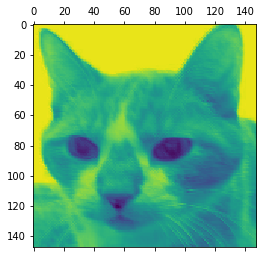

In [12]:
plt.matshow(activations_layer_1[0, :, :, 3], cmap='viridis')

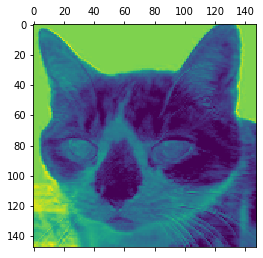

In [13]:
plt.matshow(activations_layer_1[0, :, :, 4], cmap='viridis')

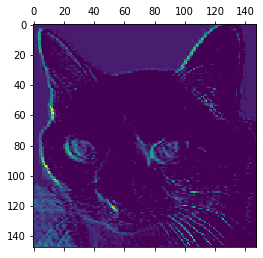

In [14]:
plt.matshow(activations_layer_1[0, :, :, 10], cmap='viridis')

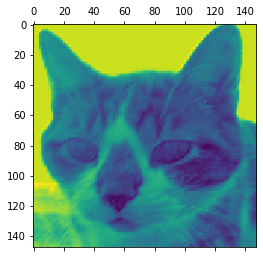

In [15]:
plt.matshow(activations_layer_1[0, :, :, 20], cmap='viridis')

conv2d_5 32
max_pooling2d_5 32


/usr/lib/python3/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


conv2d_6 64
max_pooling2d_6 64
conv2d_7 128
max_pooling2d_7 128
conv2d_8 128
max_pooling2d_8 128


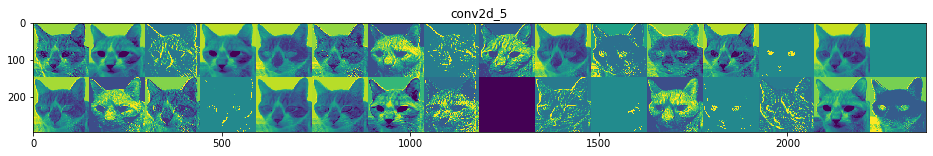

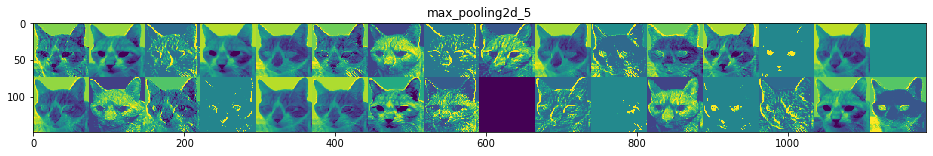

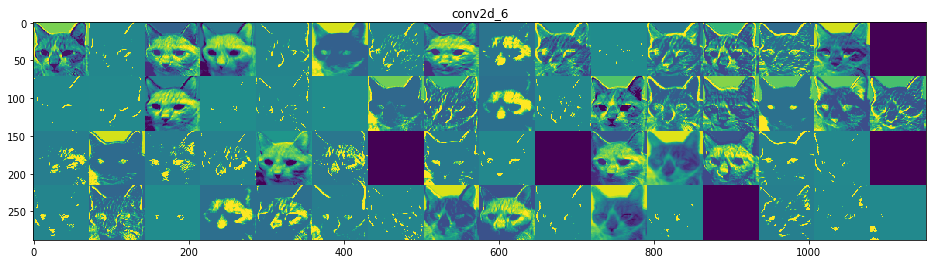

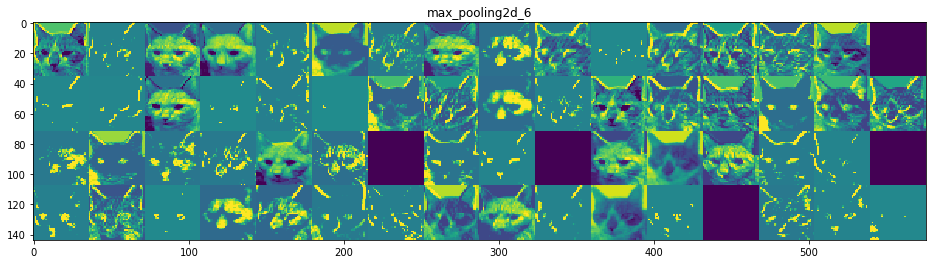

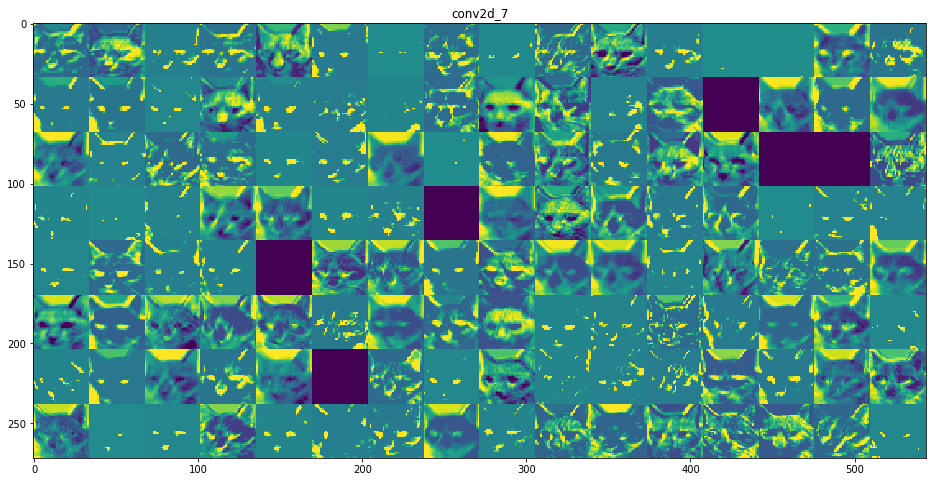

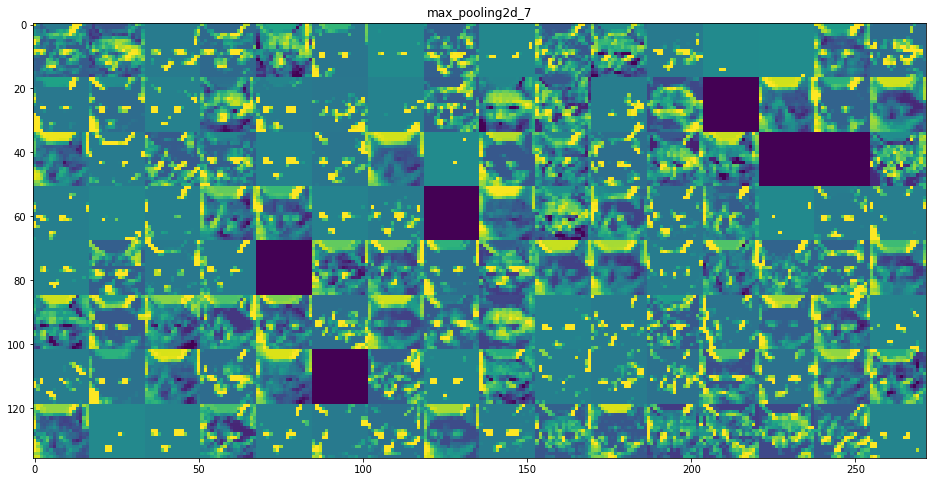

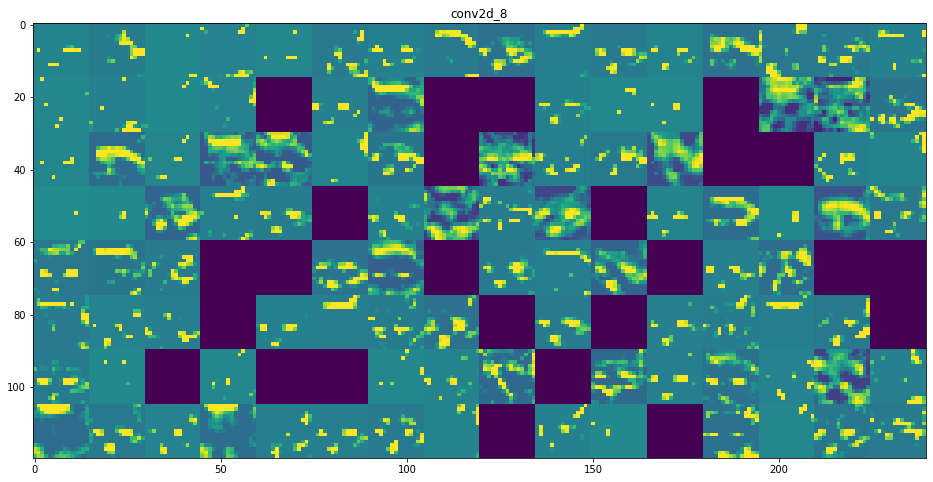

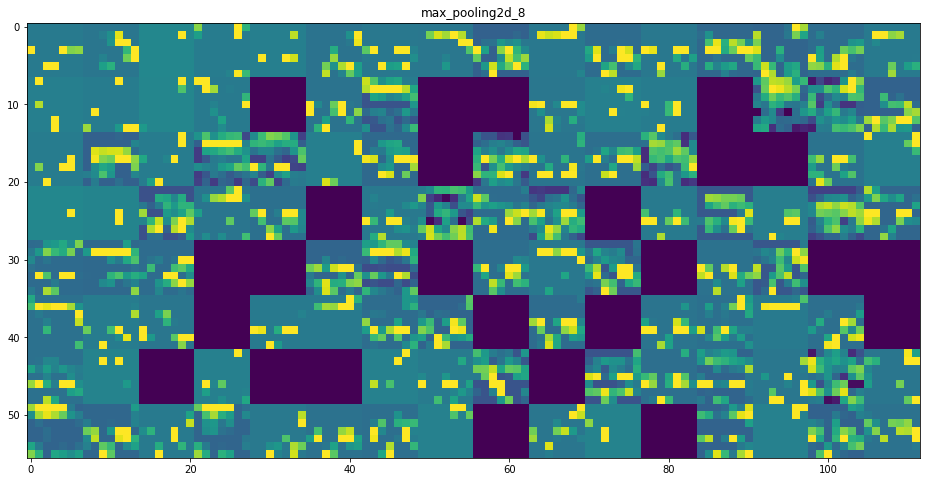

In [16]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    print(layer_name, layer_activation.shape[-1])
    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
            
    scale = 1./ size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))

    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.savefig('activation_{}.png'.format(layer_name))
